In [1]:
import pandas as pd

In [2]:
resultados_exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
resultados_exames.shape

(569, 35)

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames,
                                                       diagnostico)

In [5]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [6]:
treino_y.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y) # da erro porque há dados vazios
acuracia = classificador.score(teste_x, teste_y)


In [7]:
resultados_exames.isnull().sum() # para obter a quantidade de valores vazios

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [8]:
# Como falta a maioria dos valores na coluna do exame 33, resolve por excluir essa dimensão
valores_exames_v1 = valores_exames.drop(columns='exame_33')

In [9]:
# Assim, realizando-se todo o processo novamente
from sklearn.ensemble import RandomForestClassifier

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1,
                                                       diagnostico, test_size=0.3)


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y) 
acuracia = classificador.score(teste_x, teste_y)
print(f'O resultado da acurácia da classificação foi de {(acuracia * 100):.2f}%')

O resultado da acurácia da classificação foi de 92.40%


In [10]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
acuracia_bobo = classificador_bobo.score(teste_x, teste_y)
print(f'O resultado da acurácia da classificação do classificador bobo foi de {(acuracia_bobo * 100):.2f}%')

O resultado da acurácia da classificação do classificador bobo foi de 66.67%


In [11]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:, 0:10]], axis = 1) 
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [12]:
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                    var_name = 'exames', value_name = 'valores')

dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


In [13]:
dados_plot.shape

(5690, 3)

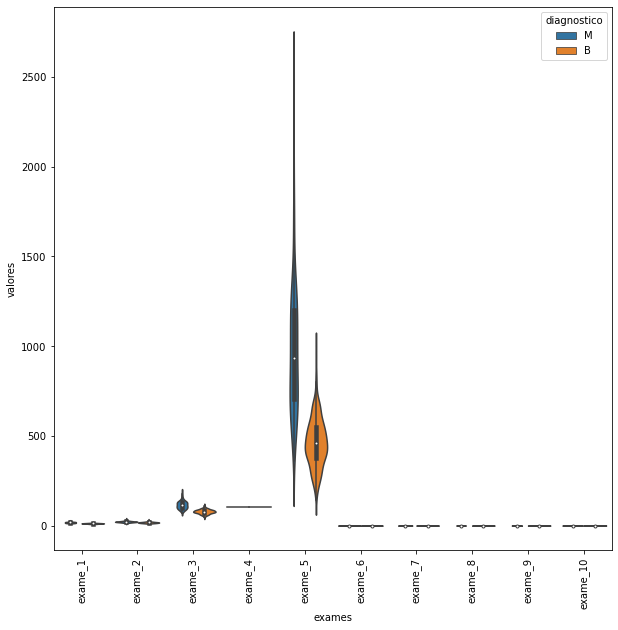

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
    
plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', 
               data = dados_plot, hue = 'diagnostico')
plt.xticks(rotation = 90)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 # percebe-se que a saida é um array de arrays do numpy
# Assim, nao podemos passar diretamente para o concat, devendo transformar em DataFrame antes

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
# Transformando em DataFrame
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns=valores_exames_v1.keys())
valores_exames_v2

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.0,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.0,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.0,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.0,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.0,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.0,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.0,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.0,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.0,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.0,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.0,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.0,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.0,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.0,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.0,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.0,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.0,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.0,2.289985,1.919083,2.219635


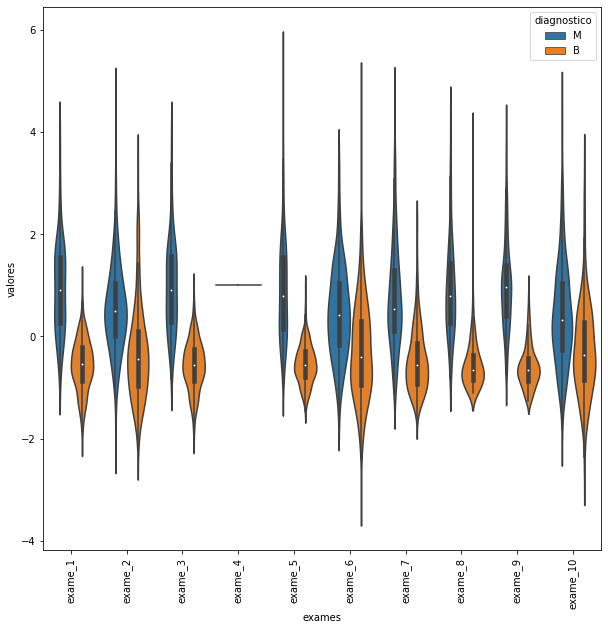

In [17]:
# Agora sim, em escala, com uma apresentação mais agradável
# Entretanto, cada coluna nao está com metade beligno e metade maligno
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:, 0:10]], axis = 1) 
dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico',
                    var_name = 'exames', value_name = 'valores')
plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', 
               data = dados_plot, hue = 'diagnostico')
plt.xticks(rotation = 90)
plt.show()

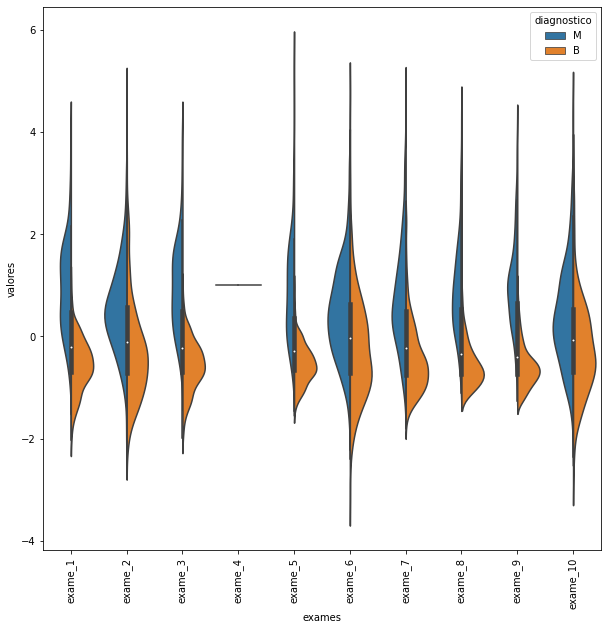

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', 
               data = dados_plot, hue = 'diagnostico',
              split = True) # passando agora o split=True, temos a vizualização desejada
plt.xticks(rotation = 90)
plt.show()

Percebe-se que o "exame 4" chama a atemção por seus valores não variarem muito. Assim, não fornece insumo nenhum para a classificação

Exames como o "exame 2" fornecem bons insumos para classificação, já que as cristas da distribuição das frequências de diagnosticos belignos e malicos são distantes

Já exames como o "exame 10" não fornecem insumos tão bons por suas cristas serem próximas

Deve-se plotar também as outras dimensões a fim de avaliá-las

In [19]:
valores_exames_v2.exame_4

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
564    1.0
565    1.0
566    1.0
567    1.0
568    1.0
Name: exame_4, Length: 569, dtype: float64

In [20]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [21]:
def grafico_violino(valores, inicio, fim):

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                         var_name="exames",
                         value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", 
                    data = dados_plot, split = True)

    plt.xticks(rotation = 90)

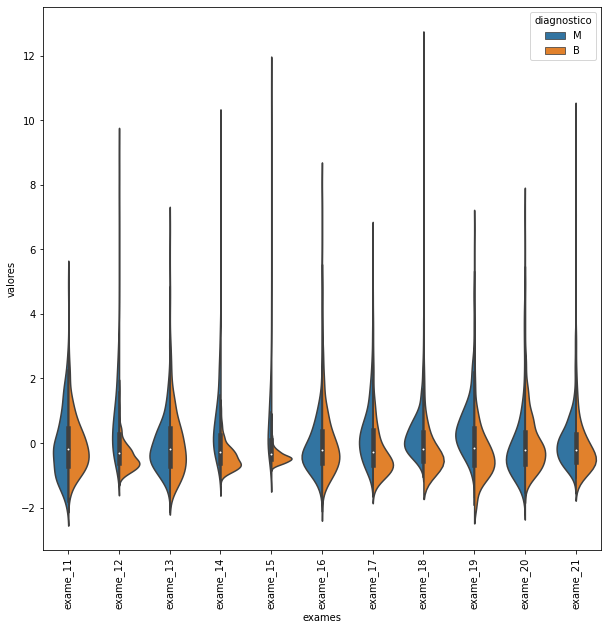

In [22]:
grafico_violino(valores_exames_v2, 10, 21)

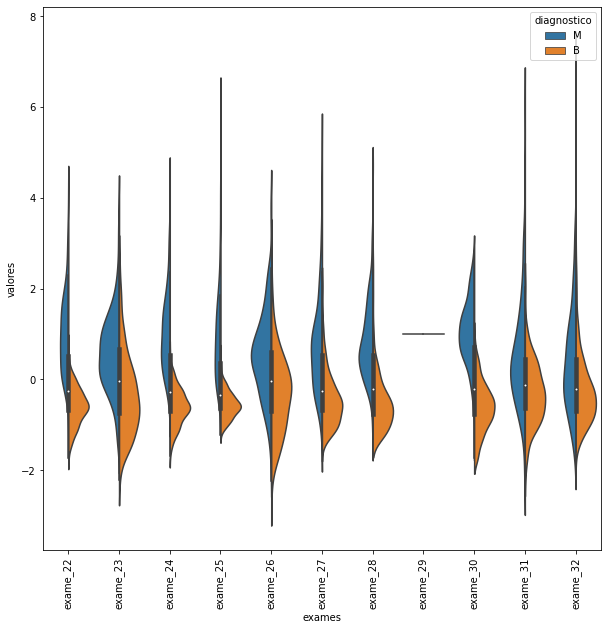

In [23]:
grafico_violino(valores_exames_v2, 21, 33)

Mais uma variavel constante (exame 29), que será removida junto com a variavel "exame 4" da base

In [24]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores,
                                                       diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y) 
    acuracia = classificador.score(teste_x, teste_y)
    print(f'O resultado da acurácia da classificação foi de {(acuracia * 100):.2f}%')
    
classificar(valores_exames_v3)

O resultado da acurácia da classificação foi de 92.98%


In [25]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

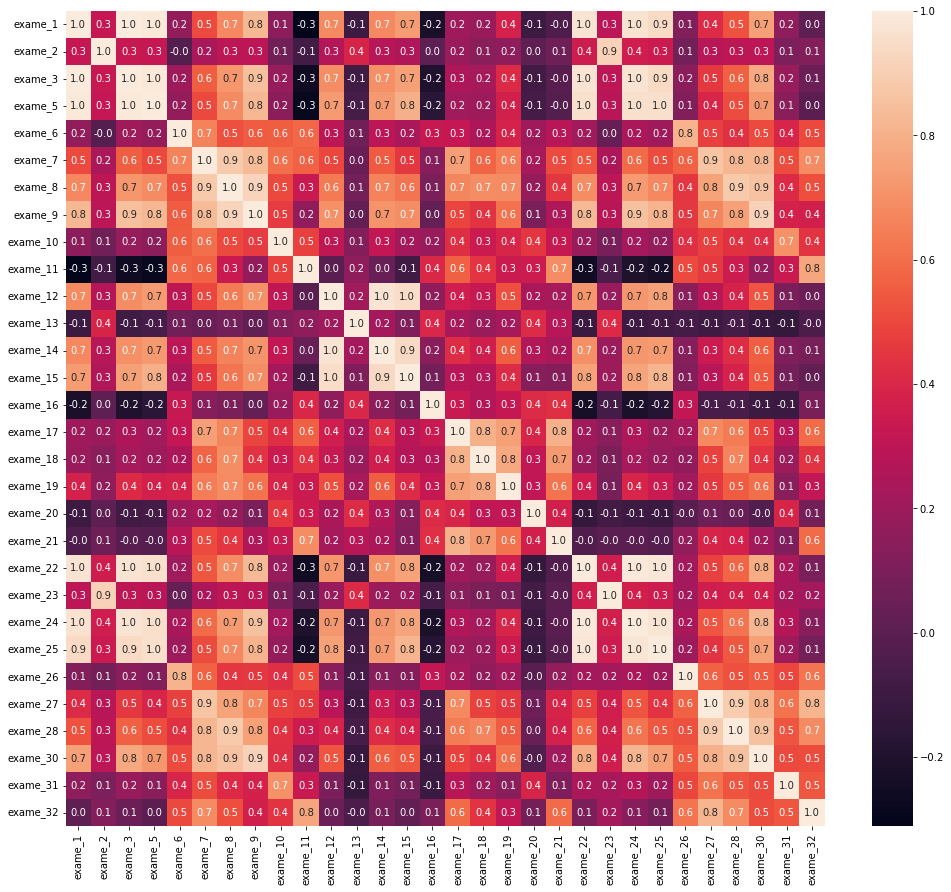

In [26]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [27]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [29]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [30]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [31]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [32]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [33]:
classificar(valores_exames_v4)

O resultado da acurácia da classificação foi de 91.81%


In [34]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
classificar(valores_exames_v5)

O resultado da acurácia da classificação foi de 92.98%


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)


In [36]:
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x0000024F2D8A1820>)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5,
                                                       diagnostico,
                                                       test_size=0.3)
                                                       
selecionar_kmelhores.fit(treino_x, treino_y)

### Da erro porque o modelo chi2 nao aceita valores negativos. Portanto, temos que voltar para a versão onde os dados não foram normalizados e retirar as colunas que retiramos a posteriori

In [37]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [38]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size=0.3)
                                                       
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [39]:
# Como pode ser visto, foram selecionadas apenas 5 colunas
print(treino_kbest.shape)
print(teste_kbest.shape)

(398, 5)
(171, 5)


In [40]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
acuracia = classificador.score(teste_kbest, teste_y)
print(f'O resultado da acurácia da classificação foi de {(acuracia * 100):.2f}%')

O resultado da acurácia da classificação foi de 92.40%


In [41]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

In [42]:
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 24.0, 'Predição'), Text(46.5, 0.5, 'Real')]

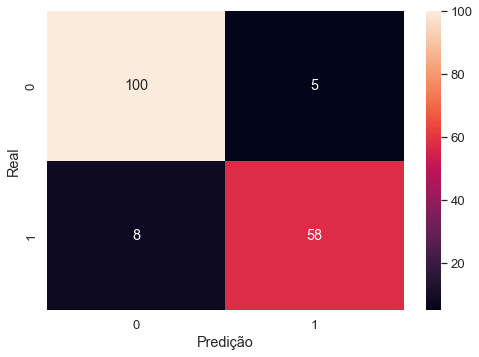

In [43]:
plt.figure(figsize=(8,5.5))
sns.set(font_scale = 1.2)
sns.heatmap(matriz_confusao, annot=True, fmt='d').set(xlabel = 'Predição', ylabel = 'Real')

Resultado da classificação 90.06%


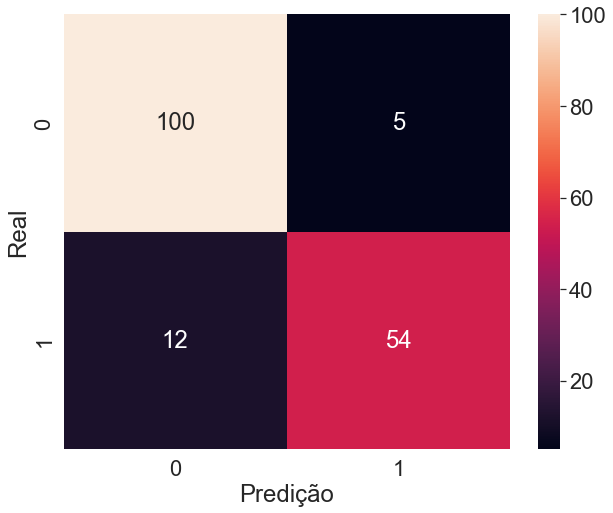

In [44]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

Resultado da classificação 92.98%


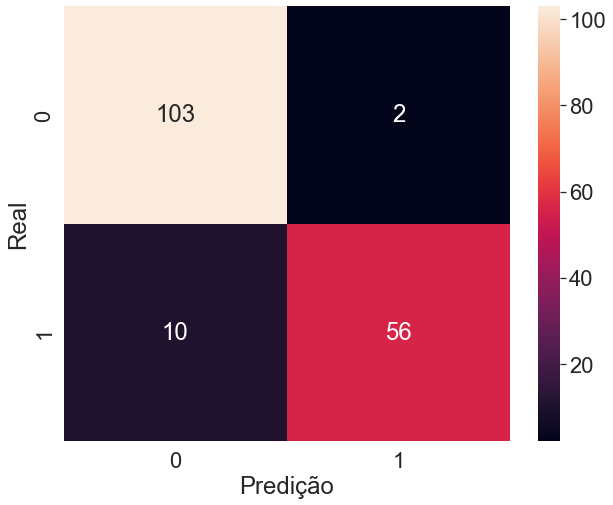

In [45]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))

In [46]:
# Para ver quantas features foram selecionadas
selecionador_rfecv.n_features_

26

In [47]:
# Um array com Treu na posição de uma feature escolhida
selecionador_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [48]:
# Passando esse array de True e False, conseguimos saber quais features foram selecionadas
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [49]:
selecionador_rfecv.grid_scores_

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

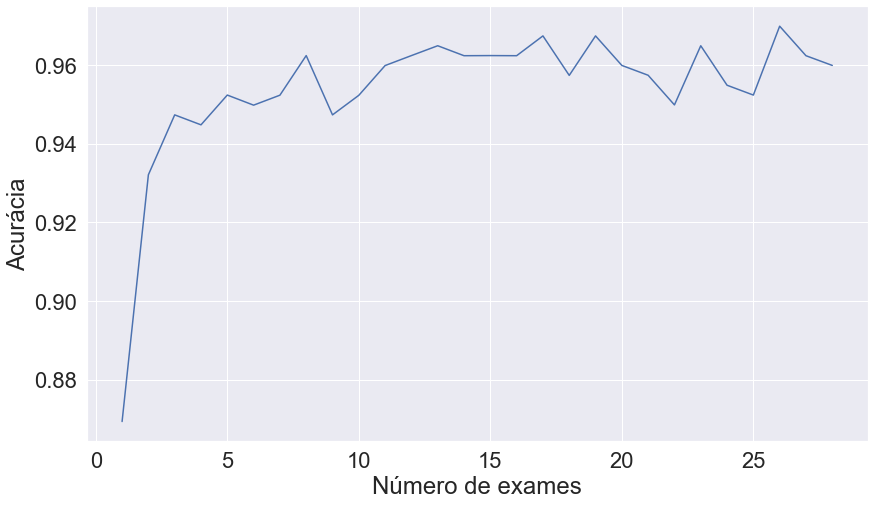

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()

Resultado da classificação 87.13%


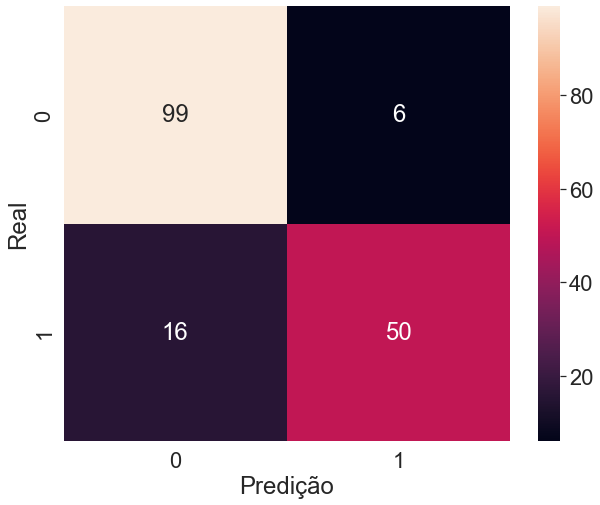

In [51]:
# Selecionando 2 features para plotar num plano
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [52]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [53]:
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

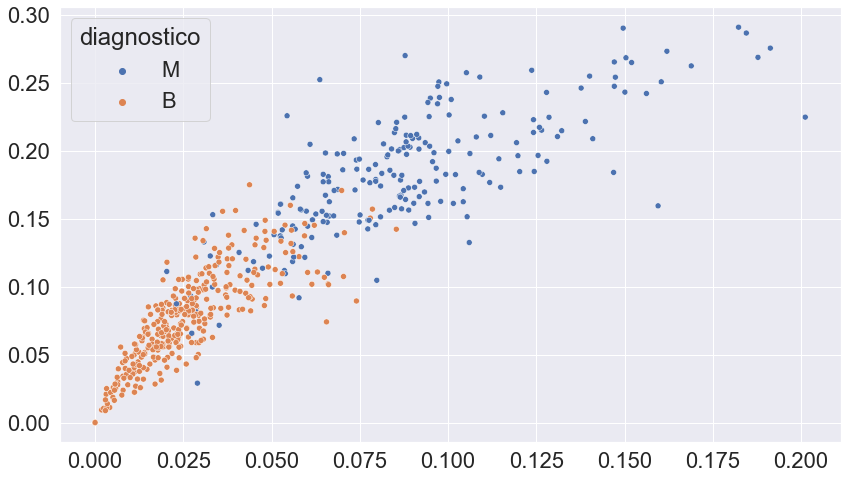

In [56]:
# Perde-se muita informação para vizualização deixando apenas duas dimensões
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:, 0], y = valores_exames_v7[:, 1], hue = diagnostico)

In [58]:
# PCA traz a informação dos valores de todas as dimensões em um único número
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

In [59]:
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

<AxesSubplot:>

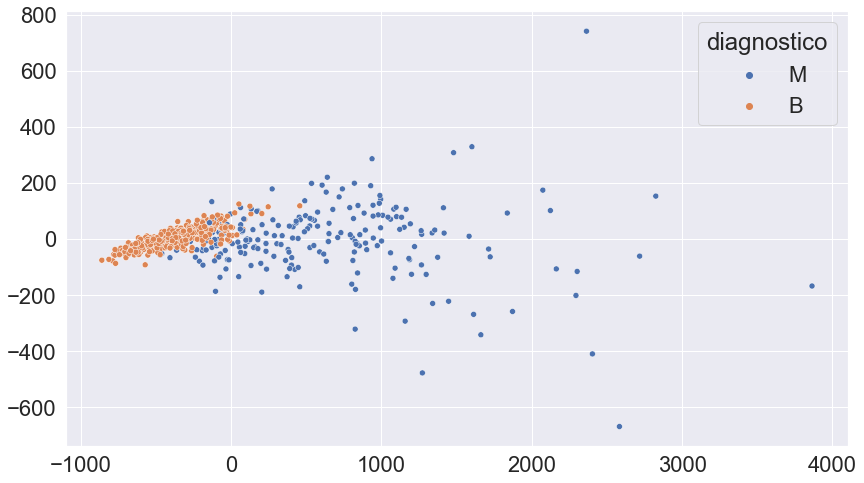

In [60]:
# Vizualização ainda nao ficou boa porque os dados v6 não estao normalizados
# PCA se comporta melhor com dados normalizados
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

<AxesSubplot:>

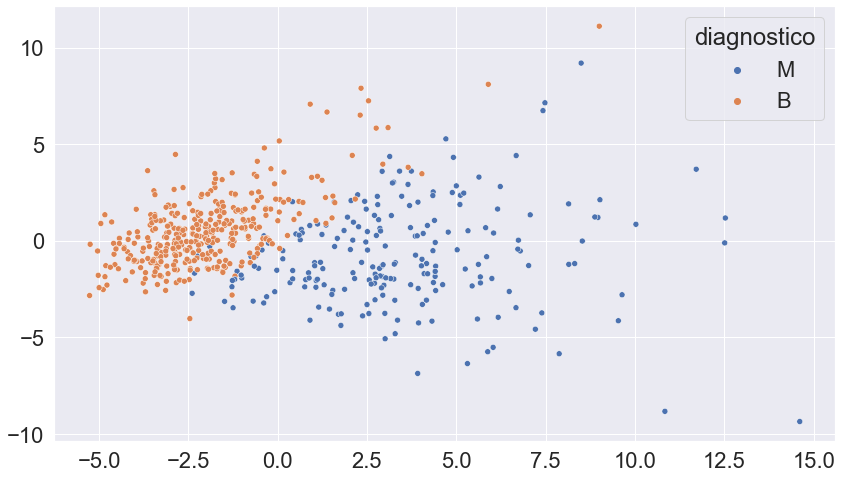

In [61]:
# Utilizndo a v5 (normalizada) para fazer o PCA, melhora-se a vizualização
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

<AxesSubplot:>

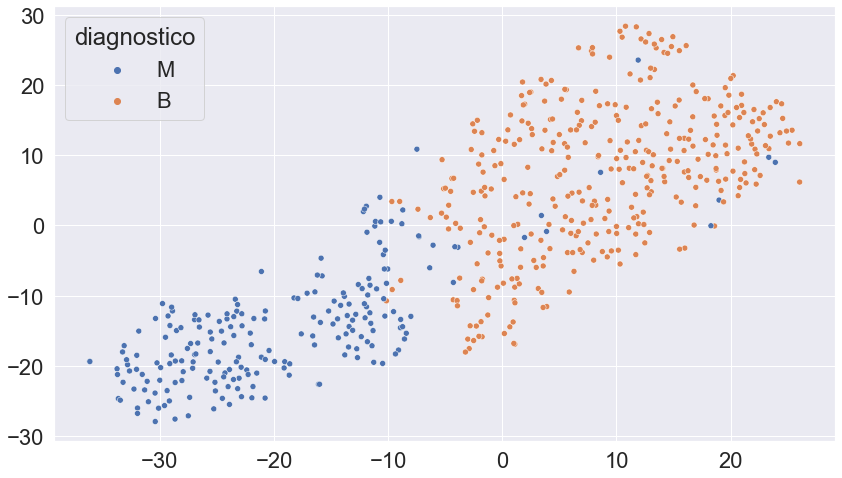

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:, 0], y = valores_exames_v9[:, 1], hue = diagnostico)